In [1]:
!pip install pyOpenSSL

In [2]:
!pip install bs4

In [3]:
html_doc = """
<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>
<p class="story">Once upon a time there were three little sisters; and their names
˓→were

<item>
    <a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
        <point>100</point>
</item>
<item>
<a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
    <point>200</point>
</item>
<item>
<a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>
    <point>300</point>
</item>
;
and they lived at the bottom of a well.</p>
<p class="story">...</p>
"""


In [4]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html_doc, 'html.parser')
print(soup.prettify)

<bound method Tag.prettify of 
<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>
<p class="story">Once upon a time there were three little sisters; and their names
˓→were

<item>
<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
        <point>100</point>
</item>
<item>
<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
    <point>200</point>
</item>
<item>
<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>
<point>300</point>
</item>
;
and they lived at the bottom of a well.</p>
<p class="story">...</p>
</body></html>>


In [5]:
soup.title

<title>The Dormouse's story</title>

In [6]:
soup.a

<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>

In [7]:
soup.find_all('a')

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

In [8]:
soup.a.text

'Elsie'

In [9]:
for x in soup.find_all('a'):
    print(x.text)

Elsie
Lacie
Tillie


In [10]:
for x in soup.find_all('point'):
    print(x.text)

100
200
300


In [11]:
aList, pointList = [], []

for item in soup.find_all('item'):
    print('-'*100)
    a = item.a.text
    point = item.point.text

    aList.append(a)
    pointList.append(point)

import pandas as pd
df = pd.DataFrame({'이름': aList, '포인트': pointList})
df

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


,이름,포인트
0,Elsie,100
1,Lacie,200
2,Tillie,300


공공데이터 포털 기상청 지상 일자료 조회 open api

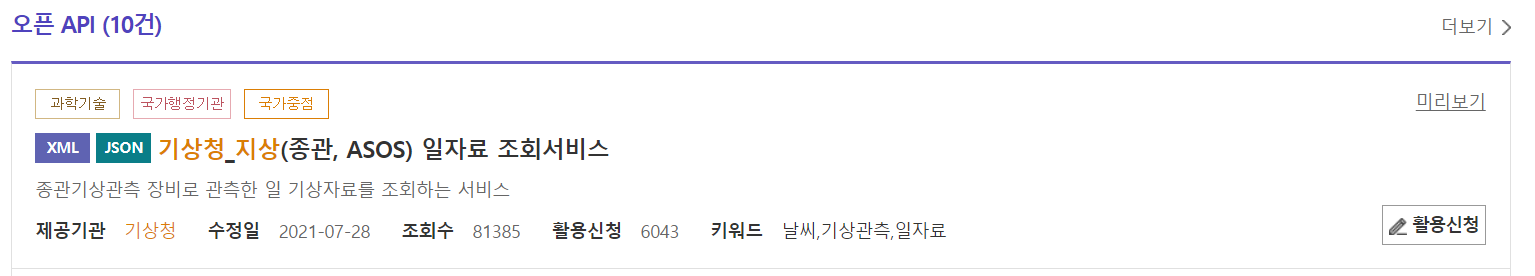

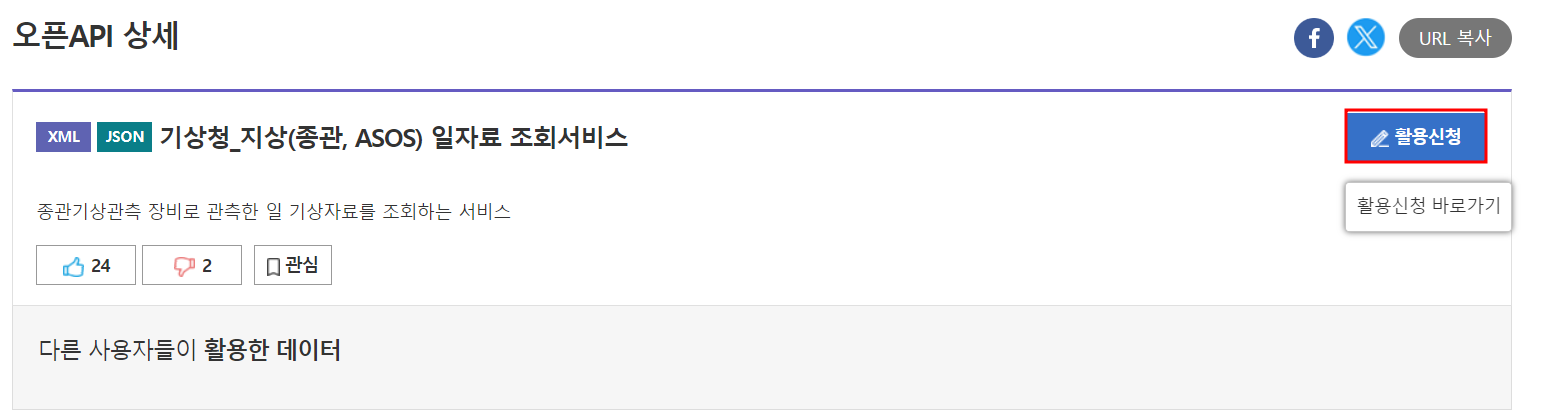

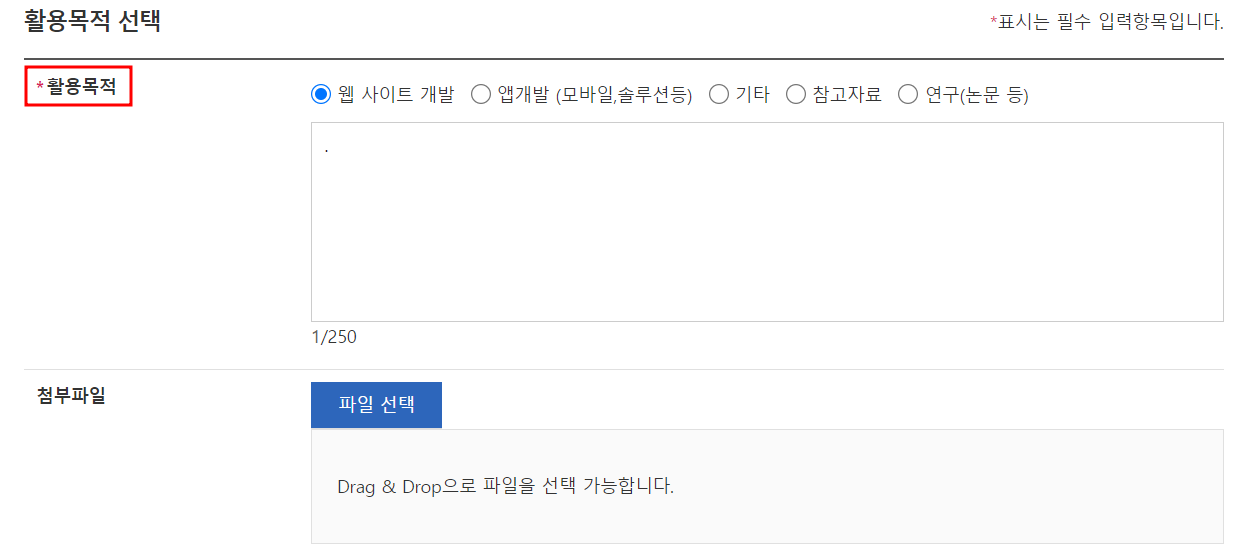

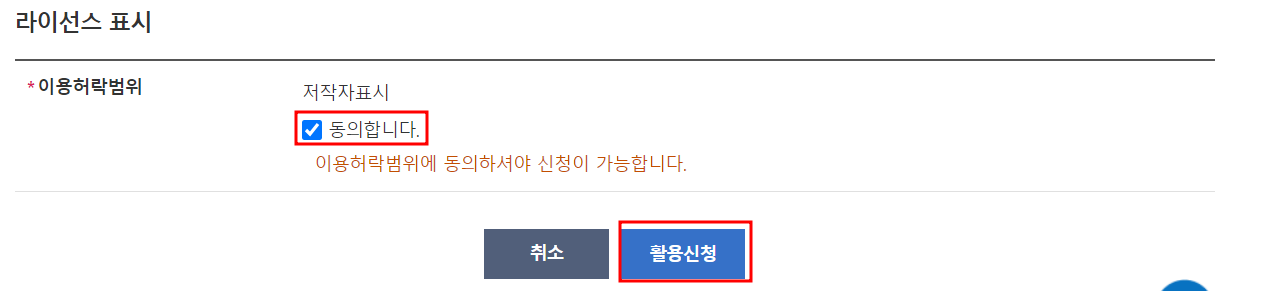

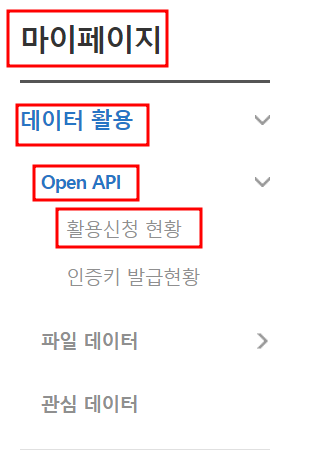

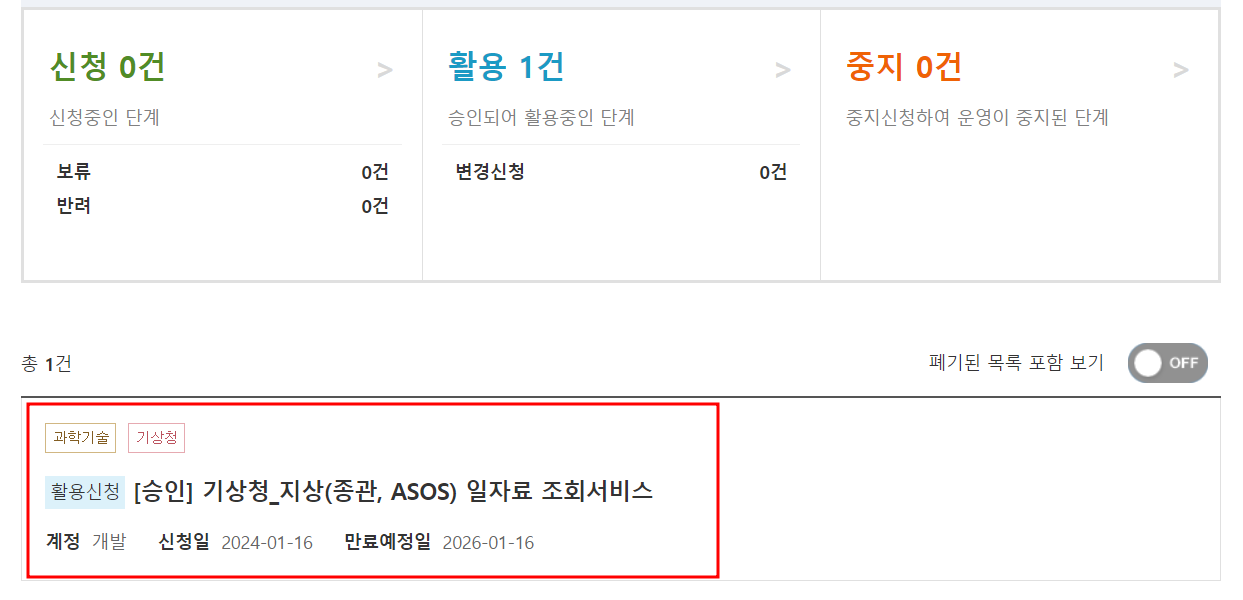

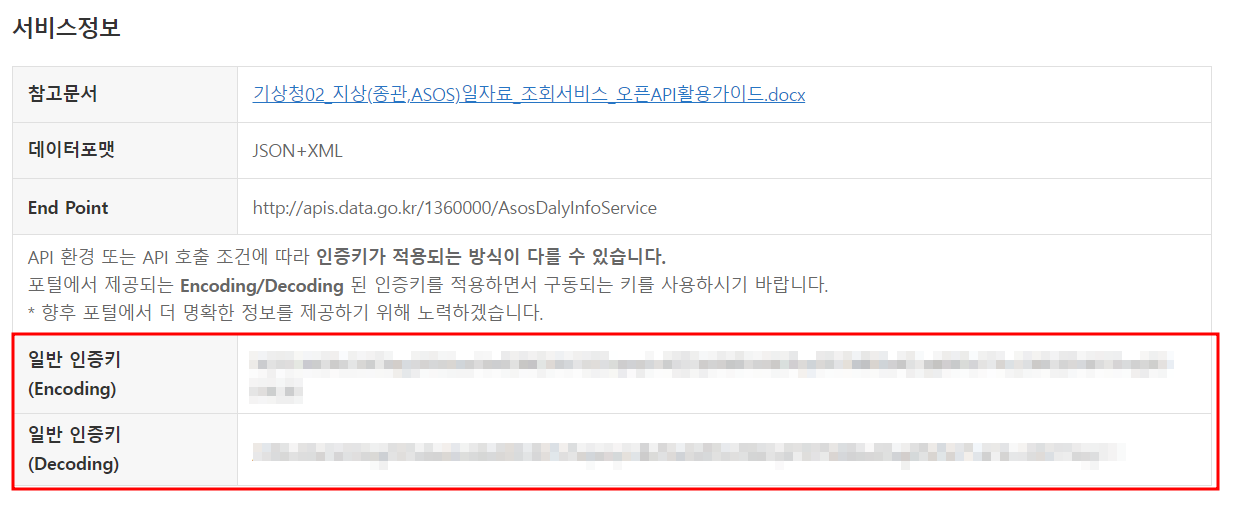

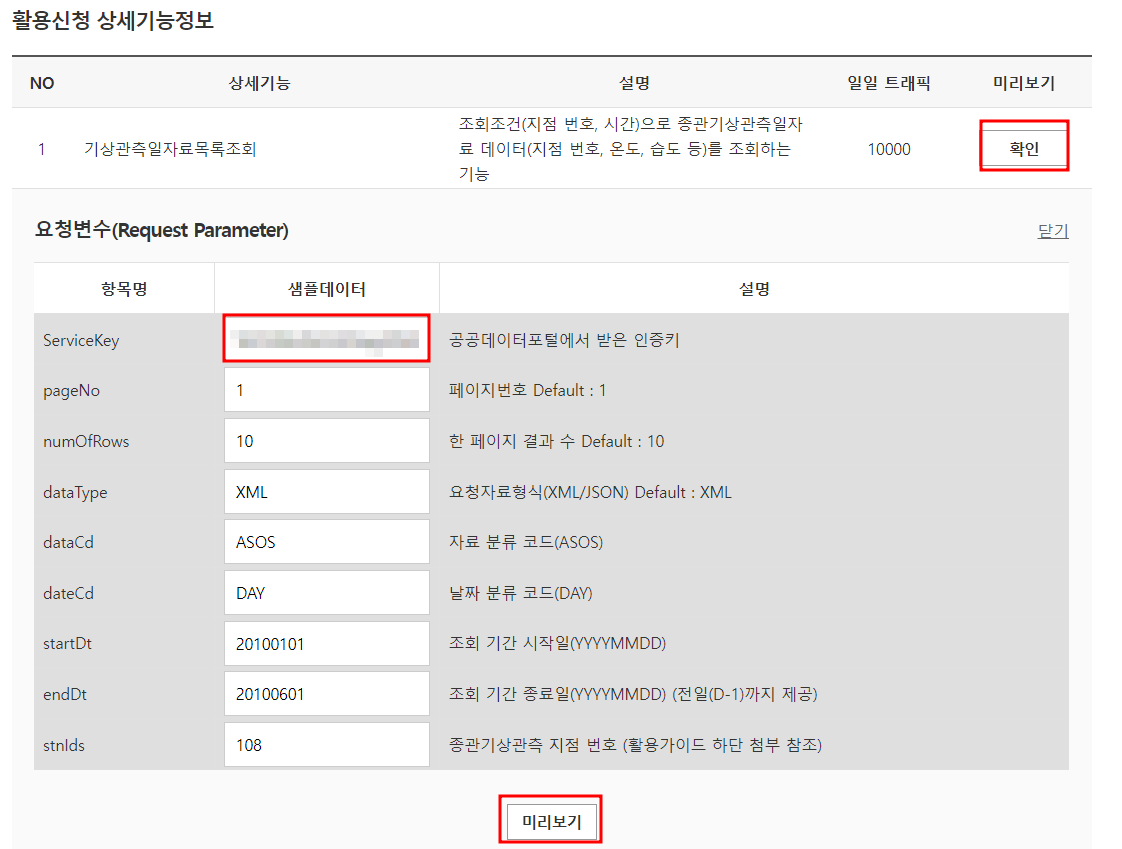

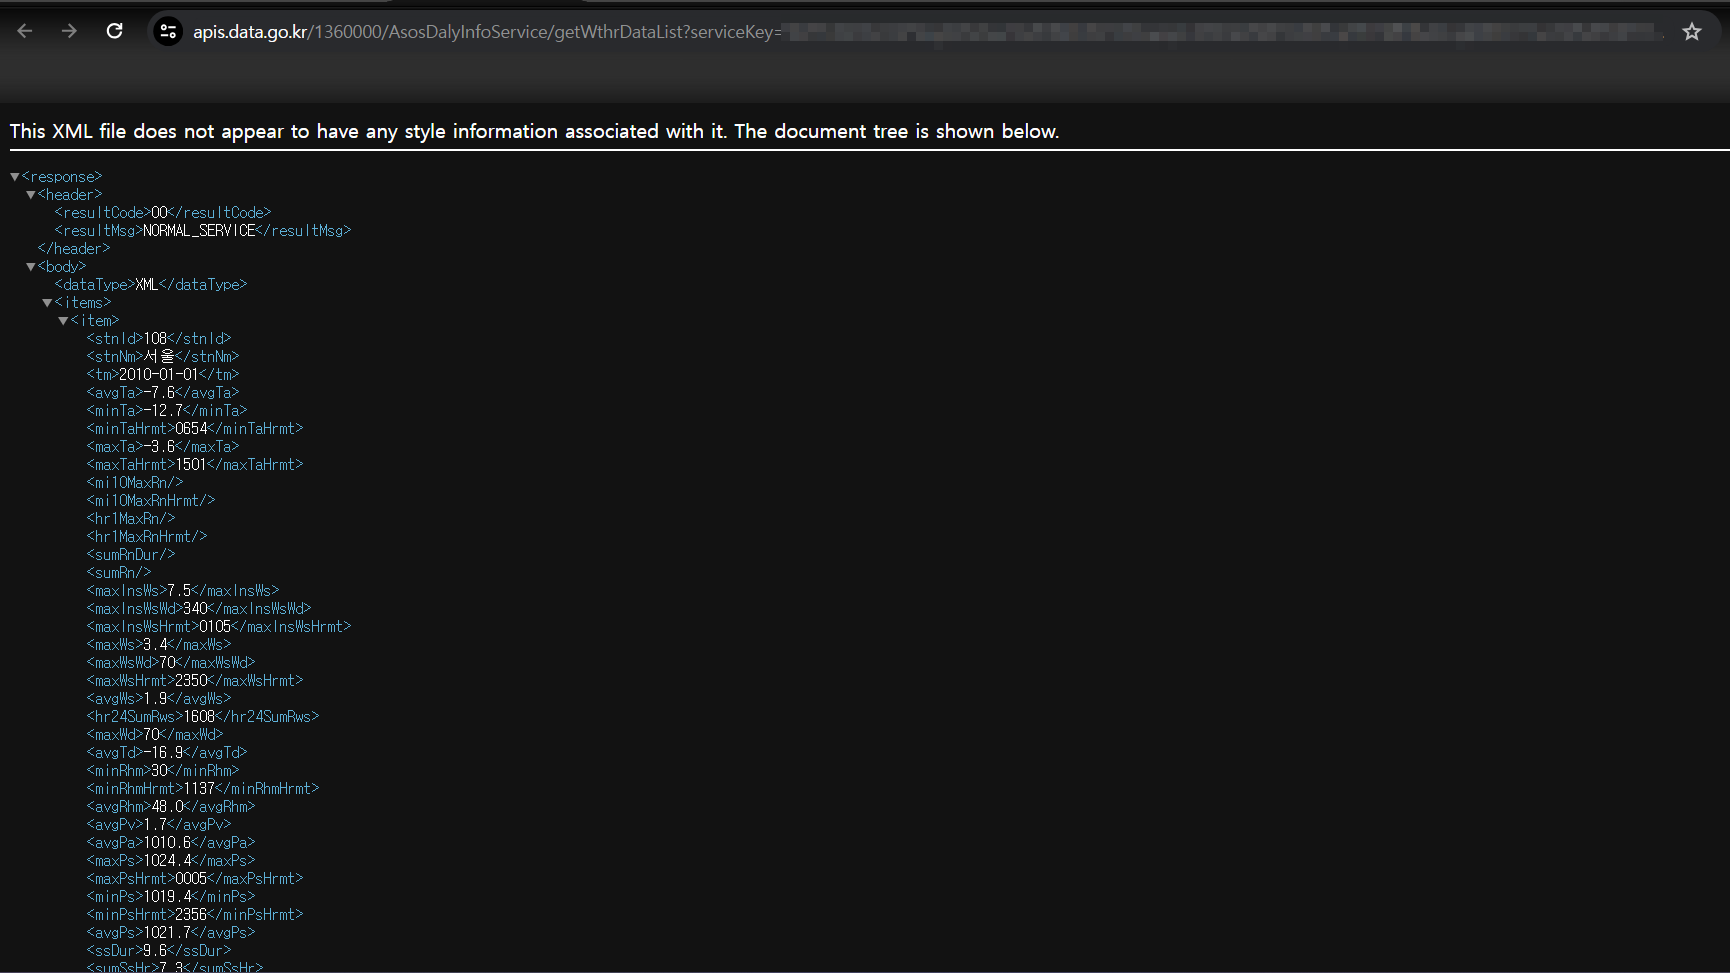



In [12]:
import requests

encoding = 'encoding 인증키'
decoding = 'decoding 인증키'
response_list = []

url = 'http://apis.data.go.kr/1360000/AsosDalyInfoService/getWthrDataList'
params = {'serviceKey' : decoding, 'pageNo' : '1', 
          'numOfRows' : '30', 'dataType' : 'xml', 'dataCd' : 'ASOS', 'dateCd' : 'DAY', 
          'startDt' : '20230101', 'endDt' : '20231231', 'stnIds' : '108' }

response = requests.get(url, params=params)

In [13]:
response.content

b'<?xml version="1.0" encoding="UTF-8"?>\r\n<response><header><resultCode>00</resultCode><resultMsg>NORMAL_SERVICE</resultMsg></header><body><dataType>XML</dataType><items><item><stnId>108</stnId><stnNm>\xec\x84\x9c\xec\x9a\xb8</stnNm><tm>2023-01-01</tm><avgTa>-0.2</avgTa><minTa>-4.3</minTa><minTaHrmt>2350</minTaHrmt><maxTa>3.8</maxTa><maxTaHrmt>1343</maxTaHrmt><mi10MaxRn></mi10MaxRn><mi10MaxRnHrmt></mi10MaxRnHrmt><hr1MaxRn></hr1MaxRn><hr1MaxRnHrmt></hr1MaxRnHrmt><sumRnDur></sumRnDur><sumRn></sumRn><maxInsWs>8.1</maxInsWs><maxInsWsWd>290</maxInsWsWd><maxInsWsHrmt>1406</maxInsWsHrmt><maxWs>5.3</maxWs><maxWsWd>320</maxWsWd><maxWsHrmt>2135</maxWsHrmt><avgWs>2.7</avgWs><hr24SumRws>2314</hr24SumRws><maxWd>270</maxWd><avgTd>-8.7</avgTd><minRhm>28</minRhm><minRhmHrmt>1656</minRhmHrmt><avgRhm>54.5</avgRhm><avgPv>3.3</avgPv><avgPa>1019.8</avgPa><maxPs>1033.2</maxPs><maxPsHrmt>2253</maxPsHrmt><minPs>1028.6</minPs><minPsHrmt>0137</minPsHrmt><avgPs>1030.8</avgPs><ssDur>9.6</ssDur><sumSsHr>9.0</sum

In [14]:
xml_obj = BeautifulSoup(response.content, 'html.parser')
xml_obj

c:\Users\bluecom014\miniconda3\envs\sesac\Lib\site-packages\bs4\builder\__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


<?xml version="1.0" encoding="UTF-8"?>
<response><header><resultcode>00</resultcode><resultmsg>NORMAL_SERVICE</resultmsg></header><body><datatype>XML</datatype><items><item><stnid>108</stnid><stnnm>서울</stnnm><tm>2023-01-01</tm><avgta>-0.2</avgta><minta>-4.3</minta><mintahrmt>2350</mintahrmt><maxta>3.8</maxta><maxtahrmt>1343</maxtahrmt><mi10maxrn></mi10maxrn><mi10maxrnhrmt></mi10maxrnhrmt><hr1maxrn></hr1maxrn><hr1maxrnhrmt></hr1maxrnhrmt><sumrndur></sumrndur><sumrn></sumrn><maxinsws>8.1</maxinsws><maxinswswd>290</maxinswswd><maxinswshrmt>1406</maxinswshrmt><maxws>5.3</maxws><maxwswd>320</maxwswd><maxwshrmt>2135</maxwshrmt><avgws>2.7</avgws><hr24sumrws>2314</hr24sumrws><maxwd>270</maxwd><avgtd>-8.7</avgtd><minrhm>28</minrhm><minrhmhrmt>1656</minrhmhrmt><avgrhm>54.5</avgrhm><avgpv>3.3</avgpv><avgpa>1019.8</avgpa><maxps>1033.2</maxps><maxpshrmt>2253</maxpshrmt><minps>1028.6</minps><minpshrmt>0137</minpshrmt><avgps>1030.8</avgps><ssdur>9.6</ssdur><sumsshr>9.0</sumsshr><hr1maxicsrhrmt>1200</

In [15]:
xml_obj.find_all('item')

[<item><stnid>108</stnid><stnnm>서울</stnnm><tm>2023-01-01</tm><avgta>-0.2</avgta><minta>-4.3</minta><mintahrmt>2350</mintahrmt><maxta>3.8</maxta><maxtahrmt>1343</maxtahrmt><mi10maxrn></mi10maxrn><mi10maxrnhrmt></mi10maxrnhrmt><hr1maxrn></hr1maxrn><hr1maxrnhrmt></hr1maxrnhrmt><sumrndur></sumrndur><sumrn></sumrn><maxinsws>8.1</maxinsws><maxinswswd>290</maxinswswd><maxinswshrmt>1406</maxinswshrmt><maxws>5.3</maxws><maxwswd>320</maxwswd><maxwshrmt>2135</maxwshrmt><avgws>2.7</avgws><hr24sumrws>2314</hr24sumrws><maxwd>270</maxwd><avgtd>-8.7</avgtd><minrhm>28</minrhm><minrhmhrmt>1656</minrhmhrmt><avgrhm>54.5</avgrhm><avgpv>3.3</avgpv><avgpa>1019.8</avgpa><maxps>1033.2</maxps><maxpshrmt>2253</maxpshrmt><minps>1028.6</minps><minpshrmt>0137</minpshrmt><avgps>1030.8</avgps><ssdur>9.6</ssdur><sumsshr>9.0</sumsshr><hr1maxicsrhrmt>1200</hr1maxicsrhrmt><hr1maxicsr>1.87</hr1maxicsr><sumgsr>10.81</sumgsr><ddmefs></ddmefs><ddmefshrmt></ddmefshrmt><ddmes></ddmes><ddmeshrmt></ddmeshrmt><sumdpthfhsc></sumdp

In [16]:
xml_obj.find_all('stnnm')

[<stnnm>서울</stnnm>,
 <stnnm>서울</stnnm>,
 <stnnm>서울</stnnm>,
 <stnnm>서울</stnnm>,
 <stnnm>서울</stnnm>,
 <stnnm>서울</stnnm>,
 <stnnm>서울</stnnm>,
 <stnnm>서울</stnnm>,
 <stnnm>서울</stnnm>,
 <stnnm>서울</stnnm>,
 <stnnm>서울</stnnm>,
 <stnnm>서울</stnnm>,
 <stnnm>서울</stnnm>,
 <stnnm>서울</stnnm>,
 <stnnm>서울</stnnm>,
 <stnnm>서울</stnnm>,
 <stnnm>서울</stnnm>,
 <stnnm>서울</stnnm>,
 <stnnm>서울</stnnm>,
 <stnnm>서울</stnnm>,
 <stnnm>서울</stnnm>,
 <stnnm>서울</stnnm>,
 <stnnm>서울</stnnm>,
 <stnnm>서울</stnnm>,
 <stnnm>서울</stnnm>,
 <stnnm>서울</stnnm>,
 <stnnm>서울</stnnm>,
 <stnnm>서울</stnnm>,
 <stnnm>서울</stnnm>,
 <stnnm>서울</stnnm>]